In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv('IMDB_Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [2]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
#length of reviews
df['Review Length (Words)'] = df['review'].apply(lambda x: len(x.split()))
review_lengths = df['Review Length (Words)']

print("Average Review Length:", review_lengths.mean())
print("Minimum Review Length:", review_lengths.min())
print("Maximum Review Length:", review_lengths.max())

Average Review Length: 231.15694
Minimum Review Length: 4
Maximum Review Length: 2470


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


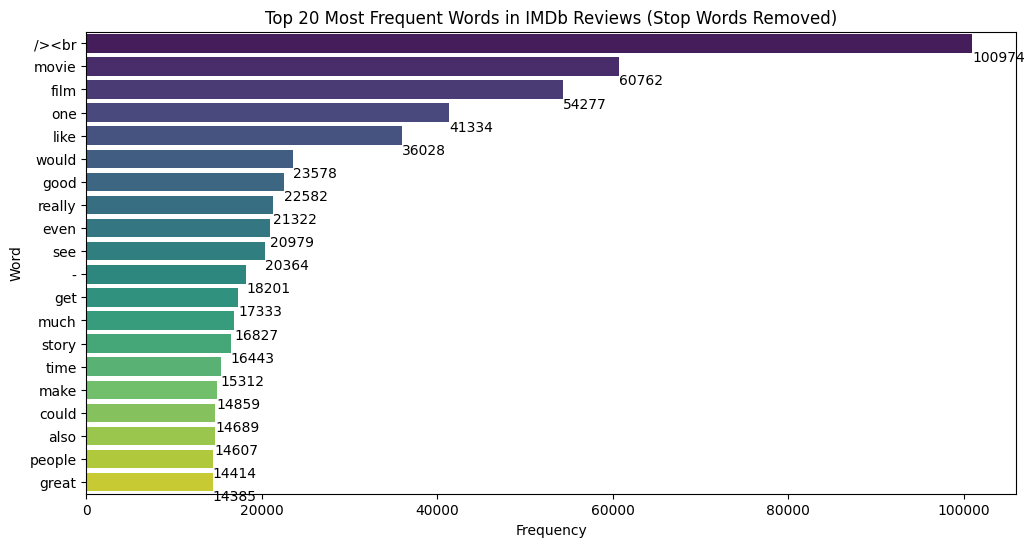

In [6]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

all_reviews = ' '.join(df['review']).split()
stop_words = set(stopwords.words('english'))
filtered_reviews = [word for word in all_reviews if word.lower() not in stop_words]
word_counts = Counter(filtered_reviews)
word_counts_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_counts_df, palette='viridis')
plt.title('Top 20 Most Frequent Words in IMDb Reviews (Stop Words Removed)')
plt.xlabel('Frequency')
plt.ylabel('Word')
for i, row in enumerate(word_counts_df.itertuples(), start=1):
    plt.text(row.Frequency, i - 0.2, row.Frequency, color='black')

plt.show()


In [7]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


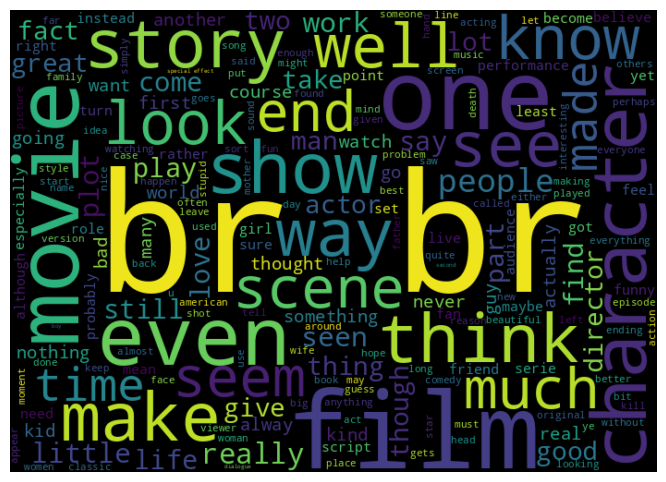

In [8]:
from wordcloud import WordCloud


all_reviews = ' '.join(df['review'])
stop_words = set(stopwords.words('english'))
filtered_reviews = ' '.join([word for word in all_reviews.split() if word.lower() not in stop_words])

wordcloud = WordCloud(width=700, height=500, background_color='black').generate(filtered_reviews.lower())  # Convert to lowercase
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [9]:
!pip install gensim


[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [10]:
from gensim import corpora, models
import gensim
import pandas as pd
import nltk
from nltk.corpus import stopwords

reviews = df['review']

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return tokens

reviews_tokens = [preprocess_text(review) for review in reviews]
dictionary = corpora.Dictionary(reviews_tokens)
corpus = [dictionary.doc2bow(text) for text in reviews_tokens]
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=5)
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

num_words = 10 

for topic_id in range(lda_model.num_topics):
    top_words = lda_model.show_topic(topic_id, num_words)
    top_words = [(word, weight) for word, weight in top_words]
    top_words = sorted(top_words, key=lambda x: x[1], reverse=True)
    print(f"Topic {topic_id}:")
    print("Highest Weighted Words:")
    for word, weight in top_words[:num_words]:
        print(f"- {word} ({weight:.3f}")    
    top_words = sorted(top_words, key=lambda x: x[1])
    print("Lowest Weighted Words:")
    for word, weight in top_words[:num_words]:
        print(f"- {word} ({weight:.3f})")
    
    print("\n")


(0, '0.002*"John" + 0.002*"role" + 0.002*"plays" + 0.002*"(as" + 0.002*"Robert" + 0.001*"James" + 0.001*"musical" + 0.001*""The" + 0.001*"George" + 0.001*"war"')
(1, '0.001*"Tarzan" + 0.001*"Stooges" + 0.001*"Streisand" + 0.001*"Curly" + 0.001*"Muppet" + 0.001*"Kermit" + 0.001*"Moe" + 0.000*"Amitabh" + 0.000*"Gromit" + 0.000*"Shemp"')
(2, '0.018*"/><br" + 0.011*"movie" + 0.010*"film" + 0.007*"one" + 0.006*"like" + 0.004*"would" + 0.004*"good" + 0.004*"really" + 0.004*"even" + 0.004*"see"')
Topic 0:
Highest Weighted Words:
- John (0.002
- role (0.002
- plays (0.002
- (as (0.002
- Robert (0.002
- James (0.001
- musical (0.001
- "The (0.001
- George (0.001
- war (0.001
Lowest Weighted Words:
- war (0.001)
- George (0.001)
- "The (0.001)
- musical (0.001)
- James (0.001)
- Robert (0.002)
- (as (0.002)
- plays (0.002)
- role (0.002)
- John (0.002)


Topic 1:
Highest Weighted Words:
- Tarzan (0.001
- Stooges (0.001
- Streisand (0.001
- Curly (0.001
- Muppet (0.001
- Kermit (0.001
- Moe (0.00

In [11]:
data_distribution=df.groupby('sentiment').size()
data_distribution

sentiment
negative    25000
positive    25000
dtype: int64

<AxesSubplot: xlabel='sentiment'>

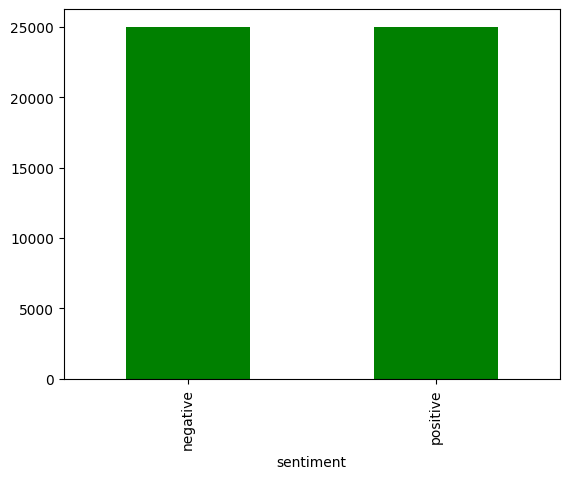

In [12]:
data_distribution_sorted = data_distribution.sort_values(ascending=False)
data_distribution_sorted.plot(kind='bar',color='green')

In [13]:
#traing and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['review'],df['sentiment'],test_size=0.2,random_state=42)

In [14]:
#Tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.75)
train_tfidf=tfidf_vectorizer.fit_transform(x_train)
test_tfidf=tfidf_vectorizer.transform(x_test)

In [15]:
print(train_tfidf.shape)
print(y_train.shape)
print(test_tfidf.shape)
print(y_test.shape)

(40000, 92692)
(40000,)
(10000, 92692)
(10000,)


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers=[('Logistic Regression',LogisticRegression()),
            ('MultiNomial Naives Bayes',MultinomialNB())]

pipelines=[]

for classifiername,classifier in classifiers:
  pipeline=Pipeline([('classifier:',classifier)])
  pipelines.append((classifiername,pipeline))

In [17]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

for classifier_name,pipeline in pipelines:
  print(f'Training and Testing:{classifier_name}')
  pipeline.fit(train_tfidf,y_train)
  y_prediction=pipeline.predict(test_tfidf)
  score=accuracy_score(y_test,y_prediction)
  confuse_matrix=confusion_matrix(y_test,y_prediction,labels=['positive','negative'])
  f1score=f1_score(y_test,y_prediction,pos_label="positive")
  classify=classification_report(y_test,y_prediction)
  print(f'Accuracy score:{round(score*100,2)}%')
  print(f'confusion Matrix:{confuse_matrix}')
  print(f'F1_score:{round(f1score*100,2)}%')
  print(f'classification report:{classify}')

Training and Testing:Logistic Regression
Accuracy score:89.41%
confusion Matrix:[[4589  450]
 [ 609 4352]]
F1_score:89.66%
classification report:              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Training and Testing:MultiNomial Naives Bayes
Accuracy score:86.52%
confusion Matrix:[[4304  735]
 [ 613 4348]]
F1_score:86.46%
classification report:              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      4961
    positive       0.88      0.85      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

nltk.download('vader_lexicon')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

sid = SentimentIntensityAnalyzer()

def predict_sentiment(text):
    # Tokenize the text and remove stop words
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    text = ' '.join(tokens)

    sentiment = sid.polarity_scores(text)
    compound_score = sentiment['compound']
    positive_score = max(0, compound_score)
    negative_score = max(0, -compound_score)
    neutral_score = 1 - positive_score - negative_score  # Calculate the neutral score
    print('Sentiment analysis score:')
    print("Positive Score:", positive_score)
    print("Neutral Score:", neutral_score)
    print("Negative Score:", negative_score)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
review=input("Enter the review :")
for classifier_name,pipeline in pipelines:
  pipeline.fit(train_tfidf,y_train)
  tests_tfidf=tfidf_vectorizer.transform([review])
  print(f'{classifier_name:} prediction')
  prediction=pipeline.predict(tests_tfidf)
  print(prediction[0])
predict_sentiment(review)

Logistic Regression prediction
negative
MultiNomial Naives Bayes prediction
negative
Sentiment analysis score:
Positive Score: 0.8146
Neutral Score: 0.1854
Negative Score: 0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ce02cbbe-2a51-4d5d-a5d9-348c2a41c888' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>